# Apache StreamPipes for Pythonistas: Demo 2
This demo shows how you can get data from the StreamPipes data lake into Python and how to subscribe to a StreamPipes data stream.

## 1. Creating a client
First we need to import all necessary classes and create a `StreamPipesClient` with an API-Key.
The API key can simple be retrieved within the UI, see our [docs](https://streampipes.apache.org/docs/docs/python/latest/getting-started/quickstart/) for more details.

In [ ]:
%pip install streampipes plotly matplotlib pandas

In [1]:
from streampipes.client import StreamPipesClient
from streampipes.client.config import StreamPipesClientConfig
from streampipes.client.credential_provider import StreamPipesApiKeyCredentials

In [2]:
import os
os.environ["USER"] = "admin@streampipes.apache.org"
os.environ["API-KEY"] = "?"

In [3]:
config = StreamPipesClientConfig(
    credential_provider=StreamPipesApiKeyCredentials.from_env(username_env="USER", api_key_env="API-KEY"),
    host_address="localhost",
    https_disabled=True,
    port=80
)

In [4]:
client = StreamPipesClient(client_config=config)

2023-04-12 20:07:11,884 - streampipes.client.client - [INFO] - [client.py:128] [_set_up_logging] - Logging successfully initialized with logging level INFO.


We can get a first overview by using the `describe` method.

In [5]:
client.describe()

2023-04-12 20:07:11,976 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.
2023-04-12 20:07:12,060 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.

Hi there!
You are connected to a StreamPipes instance running at http://localhost:80.
The following StreamPipes resources are available with this client:
3x DataStreams
2x DataLakeMeasures


Then we can have a look at the available DataLakeMeasures, where the data gets stored.

In [6]:
client.dataLakeMeasureApi.all().to_pandas()

2023-04-12 20:07:12,146 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


,measure_name,timestamp_field,pipeline_id,pipeline_name,pipeline_is_running,num_event_properties
0,Test,s0::timestamp,None,None,False,6
1,heat pump,s0::timestamp,None,None,False,16


## 2. Extracting Data from a data lake
Then we can request the data of the `heat pump` with the help of the client.

In [7]:
import pandas as pd
df = client.dataLakeMeasureApi.get(identifier="heat pump", limit=15000).to_pandas().set_index("time")
df.index = pd.to_datetime(df.index).tz_localize(None)
df

2023-04-12 20:07:12,505 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


,actual_buffer_temperature,actual_temperature_heating_circuit,actual_temperature_hot_water,flow_temperature,heating_energy_per_day,heating_power_consumption_per_day,hot_water_energy_per_day,hot_water_power_consumption_per_day,outside_temperature,return_temperature,target_buffer_temperature,target_temperature_heating_circuit,target_temperature_hot_water,total_heating_energy,total_heating_power_consumption,total_hot_water_energy,total_hot_water_power_consumption
time,,,,,,,,,,,,,,,,,
2023-02-11 18:05:55.445,34.500000,34.500000,48.700001,40.200001,36.0,10.0,11.0,3.0,3.8,34.500000,35.299999,35.400002,47.5,868.0,249.0,236.0,79.0
2023-02-11 18:10:56.439,34.500000,34.500000,48.299999,40.200001,36.0,10.0,11.0,3.0,3.6,34.500000,35.500000,35.400002,47.5,868.0,249.0,236.0,79.0
2023-02-11 18:15:56.442,34.900002,34.900002,48.200001,40.200001,36.0,10.0,11.0,3.0,3.6,34.900002,35.500000,35.500000,47.5,868.0,249.0,236.0,79.0
2023-02-11 18:20:56.451,34.900002,34.900002,48.000000,40.200001,36.0,10.0,11.0,3.0,3.5,34.900002,35.599998,35.599998,47.5,868.0,249.0,236.0,79.0
2023-02-11 18:38:24.739,35.700001,35.700001,48.000000,41.200001,36.0,10.0,11.0,3.0,3.2,35.700001,35.799999,35.799999,47.5,868.0,249.0,236.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06 09:47:27.132,34.900002,35.299999,45.799999,20.799999,16.0,4.0,5.0,1.0,8.4,34.900002,31.100000,31.100000,47.5,307.0,590.0,996.0,317.0
2023-04-06 09:52:28.129,34.900002,35.299999,45.799999,20.799999,16.0,4.0,5.0,1.0,8.7,34.900002,30.799999,30.900000,47.5,307.0,590.0,996.0,317.0
2023-04-06 09:57:29.128,34.900002,34.900002,45.799999,20.799999,16.0,4.0,5.0,1.0,8.8,34.900002,30.799999,30.700001,47.5,307.0,590.0,996.0,317.0


We can also customize the request with different parameters like the the limit of data point, the columns or the start and end date. Let's show some different temperature values with a seperate request by using the `plotly` library.

In [8]:
import plotly.express as px
import plotly.offline as po
import plotly.graph_objects as go

po.init_notebook_mode()
df_temperature = client.dataLakeMeasureApi.get(identifier="heat pump", limit=15000, columns="outside_temperature,actual_temperature_heating_circuit,actual_temperature_hot_water,target_temperature_heating_circuit,target_temperature_hot_water").to_pandas().set_index("time")
px.line(df_temperature[:1000])

2023-04-12 20:17:32,727 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


## 3. Data understanding
Simplified diagram of the heating circuit:  
![heat circuit](img/heating_circuit.png)  

We can calculate the efficency of the heat pump like this:  
  
$\text{efficency} = \dfrac{\text{heat output}}{\text{power consumption}}$

## 4. Data analytics: Heat pump efficency
Let's find out the efficency of the heat pump. We can start by calculating the total produced energy (in form of heat) per day.

In [9]:
df["day"] = [x.strftime("%Y/%m/%d") for x in df.index]
gb = df.groupby("day")
heat_per_day = gb["heating_energy_per_day"].max() + gb["hot_water_energy_per_day"].max()
px.bar(heat_per_day).update_layout(showlegend=False, yaxis_title="produced energy (kWh)")

After that we can do the same for the consumed power per day.

In [10]:
power_per_day = gb["heating_power_consumption_per_day"].max() + gb["hot_water_power_consumption_per_day"].max()
px.bar(power_per_day).update_layout(showlegend=False, yaxis_title="power consumption (kWh)")

With these two values we can calculate the efficency of the heat pump and compare it to the mean outside temperature of the day.

In [13]:
from plotly.subplots import make_subplots
df_efficiency = pd.DataFrame(heat_per_day/power_per_day, columns=["efficiency"])
df_efficiency["temperature"] = gb["outside_temperature"].mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.update_layout(title_text="<b>Comparing efficiency and temperature</b>")
fig.add_trace(go.Bar(x=df_efficiency.index,y=df_efficiency["efficiency"].values, name="efficiency"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_efficiency.index,y=df_efficiency["temperature"].values, name="temperature", mode="lines"), secondary_y=True)
fig.update_yaxes(title_text="efficiency", secondary_y=False).update_yaxes(title_text="temperature (°C)", secondary_y=True)

Finally we can show the correlation between the temperature and the efficency.

In [12]:
fig = px.scatter(df_efficiency, x="temperature", y="efficiency", title=f"<b>correlation: {df_efficiency.corr().iloc[0,1]:.3f}</b>")
fig.update_layout(width=600, height=500,title_x=0.5, title={"font":{"size":20}})

### 4.2 Comparing different days
As a second analysis we can compare the course of the temperature for different days.

In [ ]:
from datetime import datetime, timedelta, time
def plot_days(df, column, plot_mode="markers"):
    start_date = datetime.combine(df.index[0], time.min)
    fig = go.Figure()
    for i in range((df.index[-1] - df.index[0]).days + 2):
        day = start_date + timedelta(days=i)
        df_day = df[column][day:datetime.combine(day, time.max)]
        fig.add_trace(go.Scatter(x=df_day.index-timedelta(days=i),y=df_day.values, name=day.strftime('%d.%m.%Y'), mode=plot_mode))
    fig.update_layout(title=f"{column}: {df.index[0].strftime('%d.%m.%Y')} - {df.index[-1].strftime('%d.%m.%Y')}")
    fig.show()

In [ ]:
plot_days(df[datetime(2023,3,13):datetime(2023,4,6)], column="outside_temperature")

## 5. Getting live data from a data stream
Now we want to create a live plot for the data stream of the heat pump.
Therefore we can have a look at the available data streams.

In [18]:
client.dataStreamApi.all().to_pandas()

2023-04-12 20:07:20,562 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


,element_id,name,description,icon_url,app_id,includes_assets,includes_locales,internally_managed,measurement_object,index,...,dom,rev,num_transport_protocols,num_measurement_capability,num_application_links,num_included_assets,num_connected_to,num_category,num_event_properties,num_included_locales
0,sp:spdatastream:AizbSU,Test,,None,None,False,False,True,None,0,...,None,1-285623673005c3a8e89d6fb53a4869c8,1,0,0,0,0,0,7,0
1,sp:spdatastream:VsUfXQ,live heat pump,,None,None,False,False,True,None,0,...,None,1-6a9bb63dbb7434ce0e51245154ee2756,1,0,0,0,0,0,18,0
2,sp:spdatastream:dCpADW,heat pump,,None,None,False,False,True,None,0,...,None,1-da7a24b3de7a077cdf33cc4abb827607,1,0,0,0,0,0,18,0


Next we can create a StreamPipesFunction. For this we need to implement the 4 following methods:
- In `requiredStreamIds` you need to insert the `element_id` of the required streams.
- `onServiceStarted` is called when the function gets started. Here we create a dictionary to save the incoming data.
- `onEvent` is called when ever a new event arrives. The `event` contains the live data and we append the new data to the dictionary and create a plot with matplotlib.
- `onServiceStopped` is called when the function gets stopped.

In [19]:
from typing import List, Dict, Any
import matplotlib.pyplot as plt
from IPython.display import clear_output
from streampipes.functions.streampipes_function import StreamPipesFunction
from streampipes.functions.utils.function_context import FunctionContext

class LivePlot(StreamPipesFunction):
    def __init__(self, column: str) -> None:
        super().__init__()
        self.colunm = column

    def requiredStreamIds(self) -> List[str]:
        return ["sp:spdatastream:?"]

    def onServiceStarted(self, context: FunctionContext):
        print(self, "started")
        self.data = {"timestamp": [], self.colunm: []}

    def onEvent(self, event: Dict[str, Any], streamId: str):
        self.data["timestamp"].append(datetime.fromtimestamp(event["timestamp"]/1000))
        self.data[self.colunm].append(event[self.colunm])
        plt.figure(figsize=(10,5))
        plt.plot(pd.DataFrame(self.data).set_index("timestamp"))
        plt.xlabel("timestamp")
        plt.ylabel(self.colunm)
        clear_output(wait=True)
        plt.show()
        
    def onServiceStopped(self):
        print(self, "stopped")

Now we can start the function. We have to register an instance of the `LivePlot` class and them we can start the functions by initializing the `FunctionHandler`.

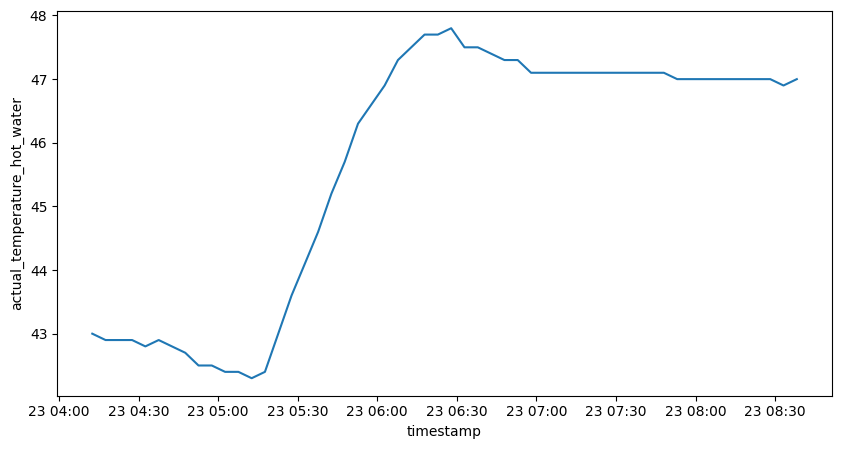

In [20]:
from streampipes.functions.function_handler import FunctionHandler
from streampipes.functions.registration import Registration

os.environ["BROKER-HOST"] = "localhost"

registration = Registration()
registration.register(LivePlot("actual_temperature_hot_water"))

function_handler = FunctionHandler(registration, client)
function_handler.initializeFunctions()

We can stop the functions whenever we want by executing the `disconnect` method.

In [21]:
function_handler.disconnect()

2023-04-12 20:08:54,114 - streampipes.functions.broker.nats_broker - [INFO] - [nats_broker.py:82] [disconnect] - Stopped connection to stream: sp:spdatastream:VsUfXQ
<__main__.LivePlot object at 0x0000028B60F1EEF0> stopped


## 6. More ideas
- Using the [Online ML functionality](https://streampipes.apache.org/docs/docs/python/latest/tutorials/4-using-online-machine-learning-on-a-streampipes-data-stream/)
  -  to predict the power consumption
  -  to detect activities like having a shower
- Creating [notifications](https://streampipes.apache.org/docs/docs/use-notifications.html) when there's a big amount of hot water 
- Using the data to optimize your heat pump:
  1. Configure the target temperature for the hot water
  2. Monitor the change of the efficency